# Data statistics

## Table of Content <a name="TOC"></a>

1. [General setups](#setups)

2. [Descriptive statistics](#descriptive) 

3. [Data transformations](#transforms) 

4. [Computing distributions](#distribs)
    

### A. Learning objectives

- to compute the descriptive statistics
- to transform data by scaling and shifting
- to compute the data distributions

### B. Use cases

- [Computing data probability densities](#density)


### C. Functions

None
  
### D. Classes and class members

- `liblibra::libdata`
  - [`DATA`](#DATA-1)
    - [`Data`](#Data-1)
    - [`ave`](#ave-1)
    - [`var`](#var-1)
    - [`sd`](#sd-1)
    - [`se`](#se-1)
    - [`mse`](#mse-1)
    - [`mae`](#mae-1)
    - [`rmse`](#rmse-1)
    - [`min_val`](#min_val-1)
    - [`min_indx`](#min_indx-1)
    - [`max_val`](#max_val-1)
    - [`max_indx`](#max_indx-1)
    - [`scale_factor`](#scale_factor-1)
    - [`shift_amount`](#shift_amount-1)
    - [`LinearTransformData`](#LinearTransformData-1)
    - [`invLinearTransformData`](#invLinearTransformData-1)
    - [`ScaleData`](#ScaleData-1) | [also here](#ScaleData-2)
    - [`ShiftData`](#ShiftData-1)
    - [`NormalizeData`](#NormalizeData-1)
    - [`Calculate_Estimators`](#Calculate_Estimators-1)
    - [`Calculate_MiniMax`](#Calculate_MiniMax-1)
    - [`Calculate_Distribution`](#Calculate_Distribution-1)
- `liblibra::librandom`
  - [`Random`](#Random-1)
    - [`uniform`](#uniform-1)
    - [`normal`](#normal-1)


## 1. General setups
<a name="setups"></a> [Back to TOC](#TOC)

In [1]:
import math
import sys
import cmath
import math
import os

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
import util.libutil as comn

from libra_py import units
import matplotlib.pyplot as plt   # plots
#matplotlib.use('Agg')
#%matplotlib inline 

import numpy as np
#from matplotlib.mlab import griddata

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

/home/alexey/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<float, std::all

## 2. Descriptive statistics
<a name="descriptive"></a>[Back to TOC](#TOC)

In Libra, there is a convenience `DATA` data type defined to hold the lists of floating point numbers.

Initially, it was designed to be used with the Libra's ANN functions and therefore is equipped with the descriptive statistics and data transformation functions
<a name="DATA-1"></a>

In [2]:
x = DATA([1.0, 0.5, 2.0, -0.5])
print(x)

Once created, the objects of such data type hold the corresponding data in the `Data` member
<a name="Data-1"></a>

In [3]:
print(Cpp2Py(x.Data))

[1.0, 0.5, 2.0, -0.5]


The object `x` also holds the descriptive statistics of the data
<a name="ave-1"></a>
- `ave`   average  \\[ \bar x = \frac{1}{N} \sum_{i=1}^N { x_i }  \\]
<a name="var-1"></a>
- `var`   variance \\[ Var[ x ] = \frac{1}{N-1} \sum_{i=1}^N { ( x_i - \bar x )^2 } \\] 
<a name="mse-1"></a>
- `mse`   mean square error \\[ MSE [ x ]= \frac{1}{N} \sum_{i=1}^N { ( x_i - \bar x )^2 } \\] 
<a name="mae-1"></a>
- `mae`   mean absolute error \\[ MAE [ x ]= \frac{1}{N} \sum_{i=1}^N { | x_i - \bar x |} \\] 
<a name="sd-1"></a>
- `sd`    sample standard deviation (unbiased estimator for variance) \\[ SD[x] = \sqrt{Var[x]} \\]
<a name="se-1"></a>
- `se`    srandard deviation of the mean \\[  SE[x] = \frac{1}{N} SD[x]  \\]
<a name="rmse-1"></a>
- `rmse`  root mean square error \\[ RMSE[x] = \sqrt{MSE[x]} \\]

In addition, the minimal and maximal values and the indices of such values are available:
<a name="min_val-1"></a>
- `min_val`      minimal value
<a name="min_indx-1"></a>
- `int min_indx` index of the minimal entry
<a name="max_val-1"></a>
- `max_val`      maximal value
<a name="max_indx-1"></a>
- `max_indx`    index of the maximal entry

Initially, these properties are not known:

In [4]:
print( "ave = ",x.ave)
print( "var = ",x.var)
print( "sd = ",x.sd)
print( "se = ",x.se)
print( "mse = ",x.mse)
print( "mae = ",x.mae)
print( "rmse = ",x.rmse)
print( "min_val =", x.min_val)
print( "min_indx =", x.min_indx)
print( "max_val =", x.max_val)
print( "max_indx =", x.max_indx)

ave =  6.9516677163375e-310
var =  0.0
sd =  6.951661808978e-310
se =  0.0
mse =  0.0
mae =  0.0
rmse =  0.0
min_val = 0.0
min_indx = 0
max_val = 0.0
max_indx = 0


But they can be computed using the `Calculate_Estimators` and `Calculate_MiniMax` functions
<a name="Calculate_Estimators-1"></a><a name="Calculate_MiniMax-1"></a>

In [5]:
def test_data(x):
    x.Calculate_Estimators()
    x.Calculate_MiniMax()

    print(x)
    print( "ave = ",x.ave)
    print( "var = ",x.var)
    print( "sd = ",x.sd)
    print( "se = ",x.se)
    print( "mse = ",x.mse)
    print( "mae = ",x.mae)
    print( "rmse = ",x.rmse)
    print( "min_val =", x.min_val)
    print( "min_indx =", x.min_indx)
    print( "max_val =", x.max_val)
    print( "max_indx =", x.max_indx)

In [6]:
test_data(x)

ave =  0.75
var =  1.0833333333333333
sd =  1.0408329997330663
se =  0.5204164998665332
mse =  0.8125
mae =  0.75
rmse =  0.9013878188659973
min_val = -0.5
min_indx = 3
max_val = 2.0
max_indx = 2


## 3. Data Transformations
<a name="transforms"></a>[Back to TOC](#TOC)

The entire data set can be rescaled uniformly 
<a name="ScaleData-1"></a>

In [7]:
x.ScaleData(2.0)
test_data(x)
print(Cpp2Py(x.Data))

ave =  1.5
var =  4.333333333333333
sd =  2.0816659994661326
se =  1.0408329997330663
mse =  3.25
mae =  1.5
rmse =  1.8027756377319946
min_val = -1.0
min_indx = 3
max_val = 4.0
max_indx = 2
[2.0, 1.0, 4.0, -1.0]


We also keep track of the rescaling factors

- `scale_factor`  uniform scaling factor
- `shift_amount`  uniform shift of the data

to be able to reconstruct the "original" data, if needed:
<a name="scale_factor-1"></a><a name="shift_amount-1"></a>

In [8]:
print(x.scale_factor, x.shift_amount)

2.0 0.0


For instance, if we scale the data again, we get:

In [9]:
x.ScaleData(2.0)
test_data(x)
print(Cpp2Py(x.Data))
print(x.scale_factor, x.shift_amount)

ave =  3.0
var =  17.333333333333332
sd =  4.163331998932265
se =  2.0816659994661326
mse =  13.0
mae =  3.0
rmse =  3.605551275463989
min_val = -2.0
min_indx = 3
max_val = 8.0
max_indx = 2
[4.0, 2.0, 8.0, -2.0]
4.0 0.0


We can simply shift the data:
<a name="ShiftData-1"></a>

In [10]:
x.ShiftData(10.0)
test_data(x)
print(Cpp2Py(x.Data))
print(x.scale_factor, x.shift_amount)

ave =  13.0
var =  17.333333333333332
sd =  4.163331998932265
se =  2.0816659994661326
mse =  13.0
mae =  3.0
rmse =  3.605551275463989
min_val = 8.0
min_indx = 3
max_val = 18.0
max_indx = 2
[14.0, 12.0, 18.0, 8.0]
4.0 10.0


Or we can apply the two operations on the original data sequentially:
<a name="LinearTransformData-1"></a>

In [11]:
y = DATA([1.0, 0.5, 2.0, -0.5])

y.LinearTransformData(4.0, 10.0)
test_data(y)
print(y.scale_factor, y.shift_amount)

ave =  13.0
var =  17.333333333333332
sd =  4.163331998932265
se =  2.0816659994661326
mse =  13.0
mae =  3.0
rmse =  3.605551275463989
min_val = 8.0
min_indx = 3
max_val = 18.0
max_indx = 2
4.0 10.0


Note that the `LinearTransformData` applies the scaling first and the sshift next, so the inverse operation is not obtained by simply inverting/reflecting the scaling and shifting parameters, for instance:

In [12]:
z = DATA(y)
z.LinearTransformData(1.0/4.0, -10.0)
test_data(z)
print(Cpp2Py(z.Data))

ave =  -6.75
var =  1.0833333333333333
sd =  1.0408329997330663
se =  0.5204164998665332
mse =  0.8125
mae =  0.75
rmse =  0.9013878188659973
min_val = -8.0
min_indx = 3
max_val = -5.5
max_indx = 2
[-6.5, -7.0, -5.5, -8.0]


We can observe that the data and descriptors are different from the original reference.

To recover the original data from the transformed one, we can either apply the shift and scaling transformations sequentially in the correct order:

In [13]:
z = DATA(y)
z.ShiftData(-10.0)
print(z.scale_factor, z.shift_amount)
z.ScaleData(1.0/4.0)
print(z.scale_factor, z.shift_amount)
test_data(z)
print(Cpp2Py(z.Data))

4.0 0.0
1.0 0.0
ave =  0.75
var =  1.0833333333333333
sd =  1.0408329997330663
se =  0.5204164998665332
mse =  0.8125
mae =  0.75
rmse =  0.9013878188659973
min_val = -0.5
min_indx = 3
max_val = 2.0
max_indx = 2
[1.0, 0.5, 2.0, -0.5]


Or we can apply the corresponding inverse function:
<a name="invLinearTransformData-1"></a>

In [15]:
z = DATA(y)
z.invLinearTransformData()
print(z.scale_factor, z.shift_amount)
test_data(z)
print(Cpp2Py(z.Data))

1.0 0.0
ave =  0.75
var =  1.0833333333333333
sd =  1.0408329997330663
se =  0.5204164998665332
mse =  0.8125
mae =  0.75
rmse =  0.9013878188659973
min_val = -0.5
min_indx = 3
max_val = 2.0
max_indx = 2
[1.0, 0.5, 2.0, -0.5]


We can normalize the data such that it's variance is 1 and mean is 0.0
<a name="NormalizeData-1"></a>

In [16]:
x = DATA([-20.0, -10.0, 00.0])
test_data(x)
print(Cpp2Py(x.Data), x.scale_factor, x.shift_amount)

x.NormalizeData()
test_data(x)
print(Cpp2Py(x.Data), x.scale_factor, x.shift_amount)


ave =  -10.0
var =  100.0
sd =  10.0
se =  5.773502691896258
mse =  66.66666666666667
mae =  6.666666666666667
rmse =  8.16496580927726
min_val = -20.0
min_indx = 0
max_val = 0.0
max_indx = 2
[-20.0, -10.0, 0.0] 1.0 0.0
ave =  0.0
var =  1.0
sd =  1.0
se =  0.5773502691896258
mse =  0.6666666666666666
mae =  0.6666666666666666
rmse =  0.816496580927726
min_val = -1.0
min_indx = 0
max_val = 1.0
max_indx = 2
[-1.0, 0.0, 1.0] 0.1 1.0


In addition, one cna choose to scale the data into a certain range (not just [-1, 1] as in the NormalizeData ). The mean is also not bound to be zero. 

For example:
<a name="ScaleData-2"></a>

In [18]:
x = DATA([-20.0, -10.0, 00.0])
test_data(x)
print(Cpp2Py(x.Data), x.scale_factor, x.shift_amount)

x.ScaleData(0.0, 1.0)
test_data(x)
print(Cpp2Py(x.Data), x.scale_factor, x.shift_amount)

ave =  -10.0
var =  100.0
sd =  10.0
se =  5.773502691896258
mse =  66.66666666666667
mae =  6.666666666666667
rmse =  8.16496580927726
min_val = -20.0
min_indx = 0
max_val = 0.0
max_indx = 2
[-20.0, -10.0, 0.0] 1.0 0.0
ave =  0.5
var =  0.25
sd =  0.5
se =  0.2886751345948129
mse =  0.16666666666666666
mae =  0.3333333333333333
rmse =  0.408248290463863
min_val = 0.0
min_indx = 0
max_val = 1.0
max_indx = 2
[0.0, 0.5, 1.0] 0.05 1.0


## 4. Probability density and cumulative distribution function
<a name="distribs"></a>[Back to TOC](#TOC)

Finally, one can use the `Calculate_Distribution` function to compute the probability density and cumulative distribution functions

Here is an example - we first sample the data (100 points) from a uniform and normal distributions. We also define the base (support of the probability distribution function). Then we conduct the analysis. 
<a name="Calculate_Distribution-1"></a><a name="density"></a><a name="Random-1"></a><a name="uniform-1"></a><a name="normal-1"></a>

In [23]:
x = []
for i in range(100):
    x.append(0.01*i)

x2 = []
for i in range(-500, 500):
    x2.append(0.01*i)

    
rnd = Random()
y, z = [], []
for i in range(100000):
    y.append(rnd.uniform(0.0, 1.0))
    z.append(rnd.normal())
    
Y = DATA(y)
Z = DATA(z)

dens_y, cum_y = Y.Calculate_Distribution(x)
dens_z, cum_z = Z.Calculate_Distribution(x2)

In [25]:
test_data(Z)

ave =  -0.001686386048279643
var =  0.985193388484811
sd =  0.9925690849934885
se =  0.003138779043648678
mse =  0.985183536550926
mae =  0.7944687634131293
rmse =  0.9925641221356563
min_val = -4.317131128522273
min_indx = 62231
max_val = 4.387076543835299
max_indx = 68067


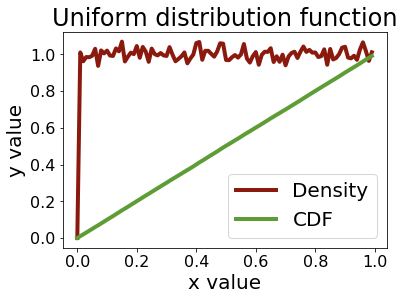

In [21]:
plt.title('Uniform distribution function')
plt.xlabel('x value')
plt.ylabel('y value')
plt.plot(x, dens_y, label='Density', linewidth=4, color = colors["11"]) 
plt.plot(x, cum_y, label='CDF', linewidth=4, color = colors["21"]) 
plt.legend()
plt.show()
plt.close()

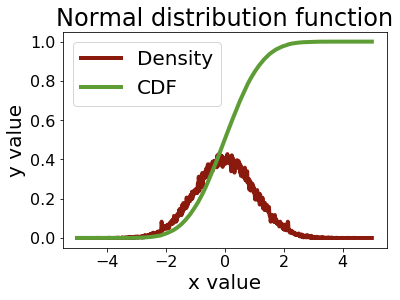

In [24]:
plt.title('Normal distribution function')
plt.xlabel('x value')
plt.ylabel('y value')
plt.plot(x2, dens_z, label='Density', linewidth=4, color = colors["11"]) 
plt.plot(x2, cum_z, label='CDF', linewidth=4, color = colors["21"]) 
plt.legend()
plt.show()
plt.close()